# **1. Konfiguracja środowiska**

In [ ]:
from IPython.display import Image
PROJECT_PATH = '/content/drive/MyDrive/YOLOv4'
!rm -rf sample_data/
!rm -rf darknet

### **Darknet**

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15376, done.
remote: Total 15376 (delta 0), reused 0 (delta 0), pack-reused 15376
Receiving objects: 100% (15376/15376), 14.01 MiB | 16.99 MiB/s, done.
Resolving deltas: 100% (10339/10339), done.


# **Przygotowanie plików**

### **Zbiory obrazów**

In [ ]:
%cd darknet/
!cp {PROJECT_PATH}/detektor/train.zip .
!cp {PROJECT_PATH}/detektor/validate.zip .
!unzip -q train.zip -d data/
!unzip -q validate.zip -d data/
!mv -v data/OID/Dataset/train/train data/train
!mv -v data/OID/Dataset/validation/validate data/validate
!rm -rf data/OID
!cp {PROJECT_PATH}/skrypty/create_path_files.py ./
!python create_path_files.py
%cd /content

/content/darknet
renamed 'data/OID/Dataset/train/train' -> 'data/train'
renamed 'data/OID/Dataset/validation/validate' -> 'data/validate'
Generating train.txt ...
100% 2400/2400 [00:00<00:00, 470763.20it/s]
Generating validate.txt ...
100% 800/800 [00:00<00:00, 815021.42it/s]
/content


In [ ]:
!cat data/train.txt | head

data/train/b475d3c1fefdfeeb.jpg
data/train/d1e6ecaa838d9ab4.jpg
data/train/b3a91419c1a4fdaa.jpg
data/train/e5e1f300a7526dd9.jpg
data/train/7ce12d8c52295d52.jpg
data/train/c682eba083dd017b.jpg
data/train/89068c859e9a095e.jpg
data/train/0e999221c6e1de87.jpg
data/train/b06f618f536054e5.jpg
data/train/f348f36df21de9e6.jpg


In [ ]:
!tree data/train | head

data/train
├── 0006ac4a96b73978.jpg
├── 0006ac4a96b73978.txt
├── 00081a6248b30e3d.jpg
├── 00081a6248b30e3d.txt
├── 000d629b356e8d93.jpg
├── 000d629b356e8d93.txt
├── 001a09ad7ade7ed4.jpg
├── 001a09ad7ade7ed4.txt
├── 001fbc2036824d74.jpg


### **Pliki konfiguracyjne**

In [ ]:
%cd darknet
!touch {PROJECT_PATH}/detektor/custom.names
!echo 'Person' > {PROJECT_PATH}/detektor/custom.names
!cp -v {PROJECT_PATH}/detektor/custom.names data/

/content/darknet
'/content/drive/MyDrive/YOLOv4/detektor/custom.names' -> 'data/custom.names'


In [ ]:
!touch {PROJECT_PATH}/detektor/custom.data
!echo 'classes = 1' > {PROJECT_PATH}/detektor/custom.data
!echo 'train = data/train.txt' >> {PROJECT_PATH}/detektor/custom.data
!echo 'valid = data/validate.txt' >> {PROJECT_PATH}/detektor/custom.data
!echo 'names = data/custom.names' >> {PROJECT_PATH}/detektor/custom.data
!echo 'backup = /content/drive/MyDrive/YOLOv4/detektor/wagi' \
>> {PROJECT_PATH}/detektor/custom.data
!cp -v {PROJECT_PATH}/detektor/custom.data data/

'/content/drive/MyDrive/YOLOv4/detektor/custom.data' -> 'data/custom.data'


In [ ]:
!cp -vn cfg/yolov4-custom.cfg {PROJECT_PATH}/detektor/custom.cfg
!sed -i 's/width=608/width=416/' {PROJECT_PATH}/detektor/custom.cfg
!sed -i 's/height=608/height=416/' {PROJECT_PATH}/detektor/custom.cfg
!sed -i 's/max_batches = 500500/max_batches = 6000/' {PROJECT_PATH}/detektor/custom.cfg
!sed -i 's/steps=400000,450000/steps=4800,5400/' {PROJECT_PATH}/detektor/custom.cfg
!sed -i 's/filters=255/filters=18/' {PROJECT_PATH}/detektor/custom.cfg
!sed -i 's/classes=80/classes=1/' {PROJECT_PATH}/detektor/custom.cfg
!cp -v {PROJECT_PATH}/detektor/custom.cfg cfg/

'/content/drive/MyDrive/YOLOv4/detektor/custom.cfg' -> 'cfg/custom.cfg'


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make --quiet --ignore-errors

# **Trenowanie**

### **Start**

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137
!./darknet detector train data/custom.data cfg/custom.cfg yolov4.conv.137 -dont_show

^C


### **Kontynuacja**

In [ ]:
!cp -v {PROJECT_PATH}/detektor/wagi/*_last.weights .
!./darknet detector train data/custom.data cfg/custom.cfg custom_last.weights -dont_show

In [ ]:
!tree $PROJECT_PATH/detektor/wagi

/content/drive/MyDrive/YOLOv4/detektor/wagi
├── custom_1000.weights
├── custom_2000.weights
├── custom_3000.weights
├── custom_4000.weights
├── custom_5000.weights
├── custom_6000.weights
├── custom_final.weights
└── custom_last.weights

0 directories, 8 files


# **Weryfikacja na obrazie**

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


'/content/drive/MyDrive/YOLOv4/detektor/wagi/custom_last.weights' -> './custom_last.weights'
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.

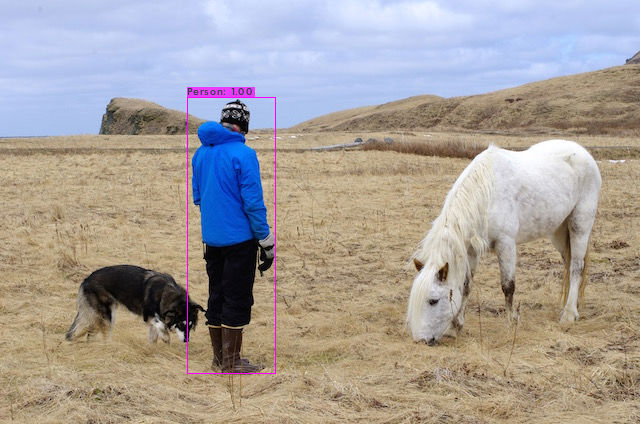

In [ ]:
!cp -v {PROJECT_PATH}/detektor/wagi/*_last.weights .
!./darknet detector test data/custom.data cfg/custom.cfg custom_last.weights data/person.jpg
Image('predictions.jpg')

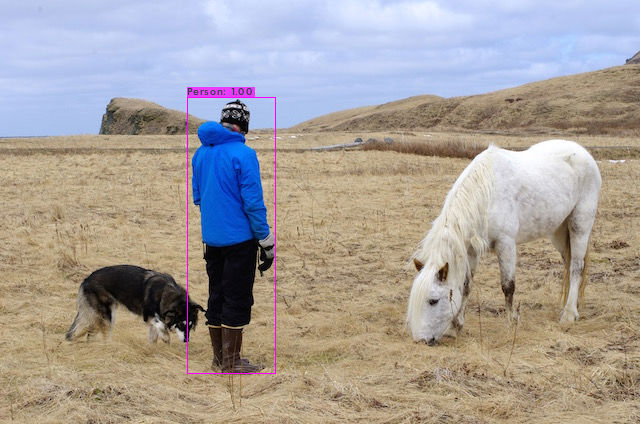

In [ ]:
Image('predictions.jpg')